## Create a car price predictor using machine learning with linear regression.

In [536]:
import pandas as pd
import numpy as np

In [537]:
data = pd.read_csv('Data/car.csv')

In [538]:
data.head()

,name,company,year,Price,kms_driven,fuel_type
0,Hyundai Santro Xing XO eRLX Euro III,Hyundai,2007,"80,000","45,000 kms",Petrol
1,Mahindra Jeep CL550 MDI,Mahindra,2006,"4,25,000",40 kms,Diesel
2,Maruti Suzuki Alto 800 Vxi,Maruti,2018,Ask For Price,"22,000 kms",Petrol
3,Hyundai Grand i10 Magna 1.2 Kappa VTVT,Hyundai,2014,"3,25,000","28,000 kms",Petrol
4,Ford EcoSport Titanium 1.5L TDCi,Ford,2014,"5,75,000","36,000 kms",Diesel


In [539]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 892 entries, 0 to 891
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   name        892 non-null    object
 1   company     892 non-null    object
 2   year        892 non-null    object
 3   Price       892 non-null    object
 4   kms_driven  840 non-null    object
 5   fuel_type   837 non-null    object
dtypes: object(6)
memory usage: 41.9+ KB


In [540]:
data.describe()

,name,company,year,Price,kms_driven,fuel_type
count,892,892,892,892,840,837
unique,525,48,61,274,258,3
top,Honda City,Maruti,2015,Ask For Price,"45,000 kms",Petrol
freq,13,235,117,35,30,440


In [541]:
data.isnull().sum()

name           0
company        0
year           0
Price          0
kms_driven    52
fuel_type     55
dtype: int64

## Data Cleaning
Quality
=======
names are pretty inconsistent
names have company names attached to it
some names are spam like 'Maruti Ertiga showroom condition with' and 'Well mentained Tata Sumo'
company: many of the names are not of any company like 'Used', 'URJENT', and so on.
year has many non-year values
year is in object. Change to integer
Price has Ask for Price
Price has commas in its prices and is in object
kms_driven has object values with kms at last.
It has nan values and two rows have 'Petrol' in them
fuel_type has nan values

In [542]:
# Solving problems in year column
data = data[data['year'].str.isnumeric()]
data['year'] = data['year'].astype(int)

In [543]:
# Removing the Price column rows which has Ask for Price
data = data[~data['Price'].str.contains('Ask For Price', na=False)]
# Removing commas in Price column
data['Price'] = data['Price'].str.replace(',', '').astype(int)

In [544]:
data['Price']

0       80000
1      425000
3      325000
4      575000
6      175000
        ...  
886    300000
888    260000
889    390000
890    180000
891    160000
Name: Price, Length: 819, dtype: int32

In [545]:
data['kms_driven']

0        45,000 kms
1            40 kms
3        28,000 kms
4        36,000 kms
6        41,000 kms
           ...     
886    1,32,000 kms
888      27,000 kms
889      40,000 kms
890          Petrol
891          Petrol
Name: kms_driven, Length: 819, dtype: object

In [546]:
# Removing kms at the end of kms_driven column
data['kms_driven'] = data['kms_driven'].str.split(' ').str.get(0).str.replace(',', '')
# Keeping only digits in kms_driven column
data = data[data['kms_driven'].str.isnumeric()]
# Converting kms_driven column to integer
data['kms_driven'] = data['kms_driven'].astype(int)

In [547]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 817 entries, 0 to 889
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   name        817 non-null    object
 1   company     817 non-null    object
 2   year        817 non-null    int32 
 3   Price       817 non-null    int32 
 4   kms_driven  817 non-null    int32 
 5   fuel_type   816 non-null    object
dtypes: int32(3), object(3)
memory usage: 35.1+ KB


In [548]:
# show NaN values in fuel_type
data[data['fuel_type'].isna()]

,name,company,year,Price,kms_driven,fuel_type
132,Toyota Corolla,Toyota,2009,275000,26000,NaN


In [549]:
# Replace NaN values with mode of fuel_type
data['fuel_type'].fillna(data['fuel_type'].mode()[0], inplace=True)

In [550]:
data['fuel_type']

0      Petrol
1      Diesel
3      Petrol
4      Diesel
6      Diesel
        ...  
883    Petrol
885    Diesel
886    Petrol
888    Diesel
889    Diesel
Name: fuel_type, Length: 817, dtype: object

In [551]:
data['name'] = data['name'].str.split(' ').str.slice(0, 3).str.join(' ')

In [552]:
data

,name,company,year,Price,kms_driven,fuel_type
0,Hyundai Santro Xing,Hyundai,2007,80000,45000,Petrol
1,Mahindra Jeep CL550,Mahindra,2006,425000,40,Diesel
3,Hyundai Grand i10,Hyundai,2014,325000,28000,Petrol
4,Ford EcoSport Titanium,Ford,2014,575000,36000,Diesel
6,Ford Figo,Ford,2012,175000,41000,Diesel
...,...,...,...,...,...,...
883,Maruti Suzuki Ritz,Maruti,2011,270000,50000,Petrol
885,Tata Indica V2,Tata,2009,110000,30000,Diesel
886,Toyota Corolla Altis,Toyota,2009,300000,132000,Petrol
888,Tata Zest XM,Tata,2018,260000,27000,Diesel


In [553]:
data.describe()

,year,Price,kms_driven
count,817.000000,8.170000e+02,817.000000
mean,2012.440636,4.115503e+05,46250.714810
std,4.002354,4.749173e+05,34283.745254
min,1995.000000,3.000000e+04,0.000000
25%,2010.000000,1.750000e+05,27000.000000
50%,2013.000000,2.999990e+05,41000.000000
75%,2015.000000,4.900000e+05,56758.000000
max,2019.000000,8.500003e+06,400000.000000


In [554]:
# save cleaned data to csv as cleaned_data.csv
data.to_csv('Data/cleaned_data.csv')

In [555]:
# read cleaned data
data = pd.read_csv('Data/cleaned_data.csv')

In [556]:
# remove Unnamed: 0 column
data = data.drop(columns='Unnamed: 0')

In [557]:
data

,name,company,year,Price,kms_driven,fuel_type
0,Hyundai Santro Xing,Hyundai,2007,80000,45000,Petrol
1,Mahindra Jeep CL550,Mahindra,2006,425000,40,Diesel
2,Hyundai Grand i10,Hyundai,2014,325000,28000,Petrol
3,Ford EcoSport Titanium,Ford,2014,575000,36000,Diesel
4,Ford Figo,Ford,2012,175000,41000,Diesel
...,...,...,...,...,...,...
812,Maruti Suzuki Ritz,Maruti,2011,270000,50000,Petrol
813,Tata Indica V2,Tata,2009,110000,30000,Diesel
814,Toyota Corolla Altis,Toyota,2009,300000,132000,Petrol
815,Tata Zest XM,Tata,2018,260000,27000,Diesel


In [558]:
# save cleaned data to csv as cleaned_data.csv
data.to_csv('Data/cleaned_data.csv')

In [559]:
# read cleaned data
car_data = pd.read_csv('Data/cleaned_data.csv')

In [560]:
# remove Unnamed: 0 column
car_data = car_data.drop(columns='Unnamed: 0')

In [561]:
data

,name,company,year,Price,kms_driven,fuel_type
0,Hyundai Santro Xing,Hyundai,2007,80000,45000,Petrol
1,Mahindra Jeep CL550,Mahindra,2006,425000,40,Diesel
2,Hyundai Grand i10,Hyundai,2014,325000,28000,Petrol
3,Ford EcoSport Titanium,Ford,2014,575000,36000,Diesel
4,Ford Figo,Ford,2012,175000,41000,Diesel
...,...,...,...,...,...,...
812,Maruti Suzuki Ritz,Maruti,2011,270000,50000,Petrol
813,Tata Indica V2,Tata,2009,110000,30000,Diesel
814,Toyota Corolla Altis,Toyota,2009,300000,132000,Petrol
815,Tata Zest XM,Tata,2018,260000,27000,Diesel


In [562]:
data.describe()

,year,Price,kms_driven
count,817.000000,8.170000e+02,817.000000
mean,2012.440636,4.115503e+05,46250.714810
std,4.002354,4.749173e+05,34283.745254
min,1995.000000,3.000000e+04,0.000000
25%,2010.000000,1.750000e+05,27000.000000
50%,2013.000000,2.999990e+05,41000.000000
75%,2015.000000,4.900000e+05,56758.000000
max,2019.000000,8.500003e+06,400000.000000


In [563]:
# which car is max priced
car_data[car_data['Price'] == car_data['Price'].max()]

,name,company,year,Price,kms_driven,fuel_type
535,Mahindra XUV500 W6,Mahindra,2014,8500003,45000,Diesel


In [564]:
# remove car price above 60 lakhs
car_data = car_data[car_data['Price'] < 6000000].reset_index(drop=True)

In [565]:
car_data.describe()

,year,Price,kms_driven
count,816.000000,8.160000e+02,816.000000
mean,2012.438725,4.016380e+05,46252.247549
std,4.004436,3.813805e+05,34304.743769
min,1995.000000,3.000000e+04,0.000000
25%,2010.000000,1.750000e+05,27000.000000
50%,2013.000000,2.999990e+05,41000.000000
75%,2015.000000,4.900000e+05,56818.500000
max,2019.000000,3.100000e+06,400000.000000


# Data Visualization

In [566]:
import matplotlib.pyplot as plt
import seaborn as sns

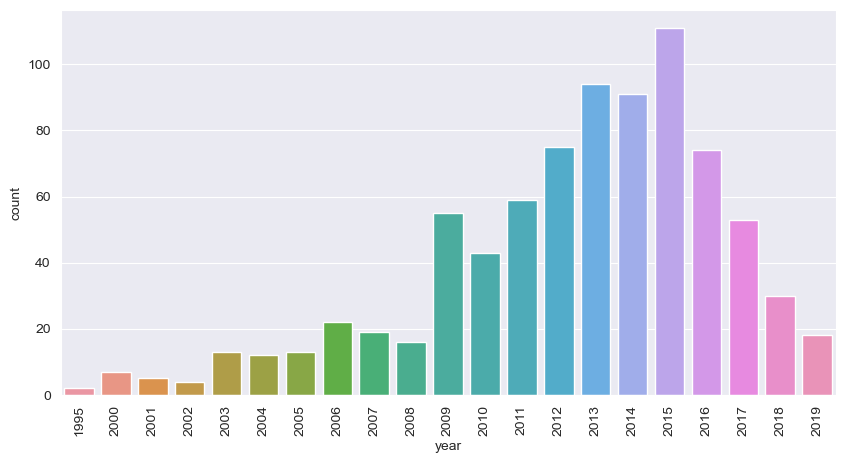

In [567]:
# count of cars based on year
plt.figure(figsize=(10, 5))
sns.countplot(x='year', data=car_data)
plt.xticks(rotation=90)
plt.show()

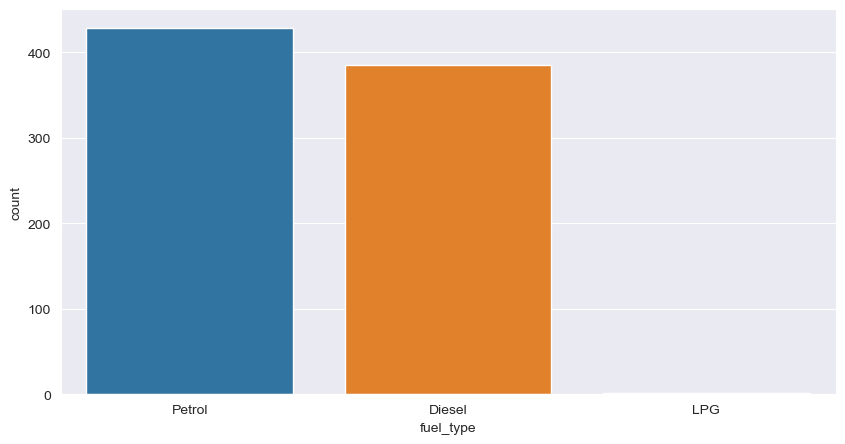

In [568]:
# count of cars based on fuel_type
plt.figure(figsize=(10, 5))
sns.countplot(x='fuel_type', data=car_data)
plt.show()

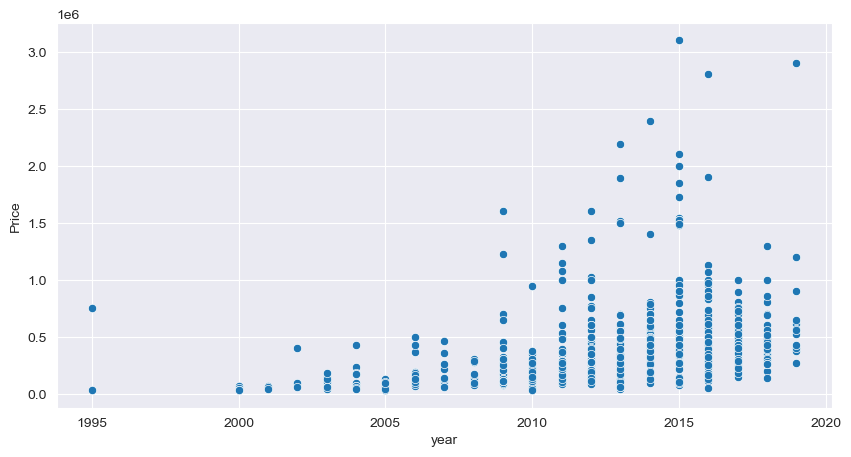

In [569]:
# Scatter plot of year vs price
plt.figure(figsize=(10, 5))
sns.scatterplot(x='year', y='Price', data=car_data)
plt.show()

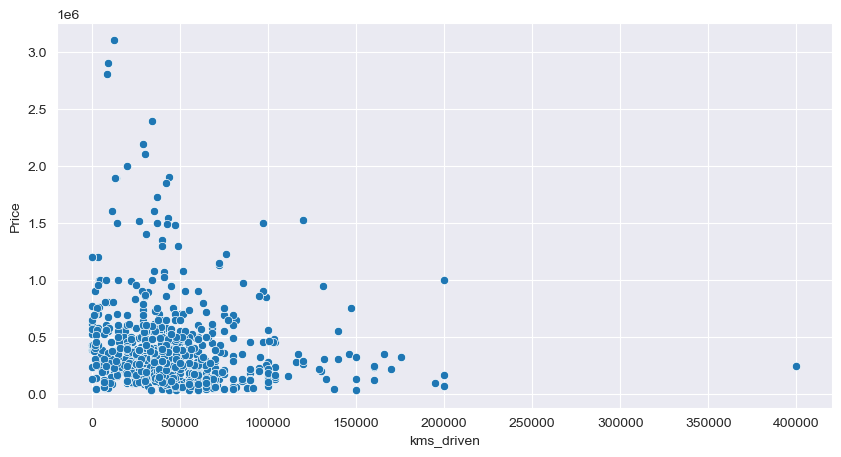

In [570]:
# Scatter plot of kms_driven vs price
plt.figure(figsize=(10, 5))
sns.scatterplot(x='kms_driven', y='Price', data=car_data)
plt.show()

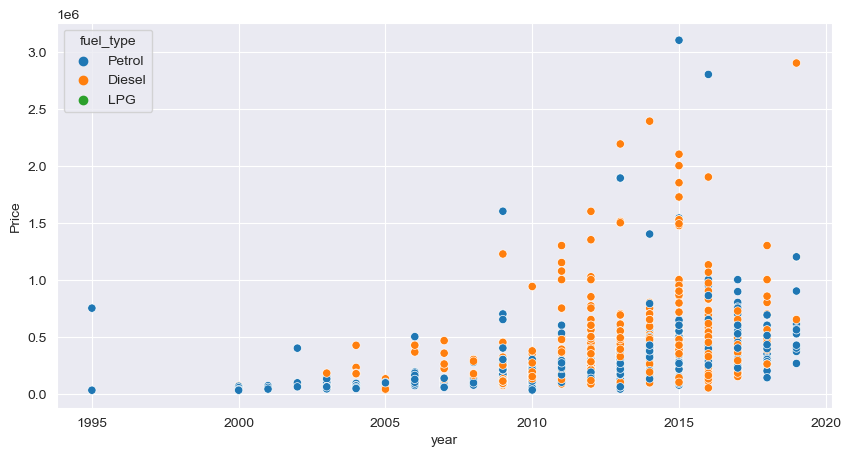

In [571]:
# Relationship of Price with FuelType, Year and Company mixed
plt.figure(figsize=(10, 5))
sns.scatterplot(x='year', y='Price', hue='fuel_type', data=car_data)
plt.show()

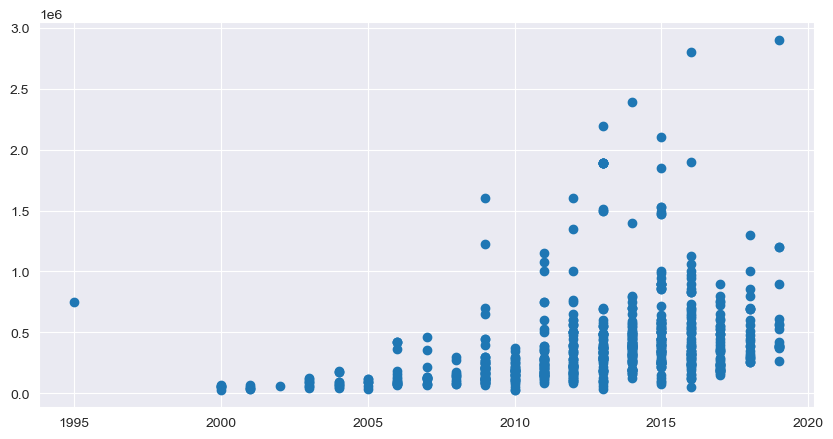

In [572]:
plt.figure(figsize=(10, 5))
plt.scatter(X_train['year'], y_train)
plt.show()

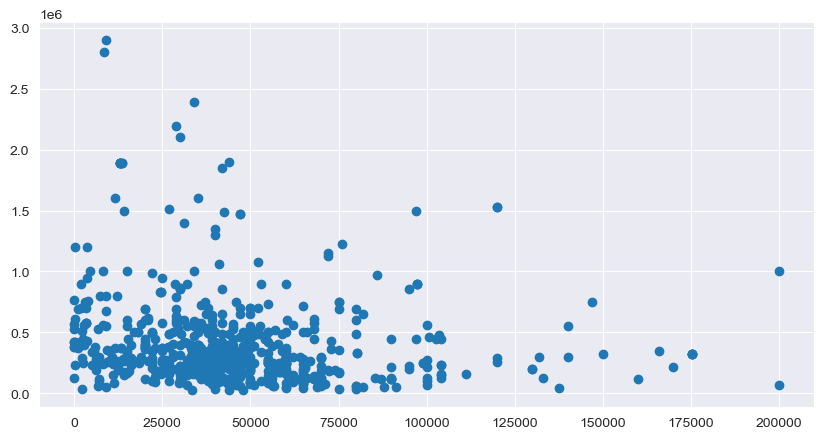

In [573]:
plt.figure(figsize=(10, 5))
plt.scatter(X_train['kms_driven'], y_train)
plt.show()

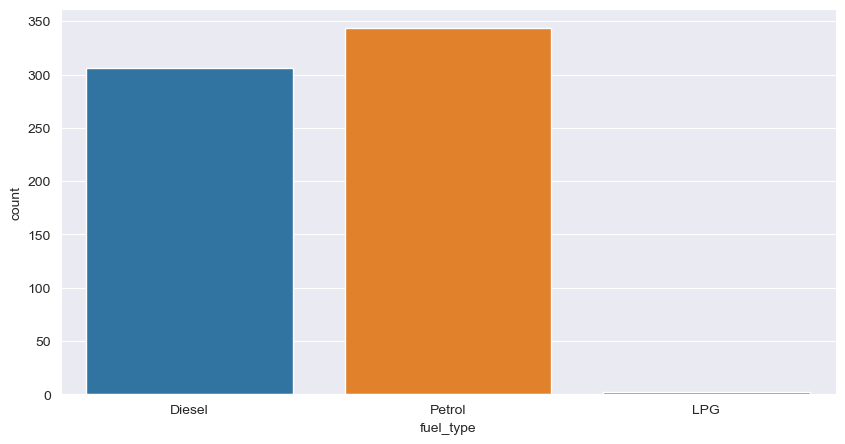

In [574]:
plt.figure(figsize=(10, 5))
sns.countplot(x='fuel_type', data=X_train)
plt.show()

## Cleand Data

In [575]:
car_data.head()

,name,company,year,Price,kms_driven,fuel_type
0,Hyundai Santro Xing,Hyundai,2007,80000,45000,Petrol
1,Mahindra Jeep CL550,Mahindra,2006,425000,40,Diesel
2,Hyundai Grand i10,Hyundai,2014,325000,28000,Petrol
3,Ford EcoSport Titanium,Ford,2014,575000,36000,Diesel
4,Ford Figo,Ford,2012,175000,41000,Diesel


## Model Building

In [576]:
X = car_data.drop(columns='Price')
y = car_data['Price']

In [577]:
X

,name,company,year,kms_driven,fuel_type
0,Hyundai Santro Xing,Hyundai,2007,45000,Petrol
1,Mahindra Jeep CL550,Mahindra,2006,40,Diesel
2,Hyundai Grand i10,Hyundai,2014,28000,Petrol
3,Ford EcoSport Titanium,Ford,2014,36000,Diesel
4,Ford Figo,Ford,2012,41000,Diesel
...,...,...,...,...,...
811,Maruti Suzuki Ritz,Maruti,2011,50000,Petrol
812,Tata Indica V2,Tata,2009,30000,Diesel
813,Toyota Corolla Altis,Toyota,2009,132000,Petrol
814,Tata Zest XM,Tata,2018,27000,Diesel


In [578]:
y

0       80000
1      425000
2      325000
3      575000
4      175000
        ...  
811    270000
812    110000
813    300000
814    260000
815    390000
Name: Price, Length: 816, dtype: int64

In [579]:
from sklearn.model_selection import train_test_split

In [580]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=51)

In [581]:
X_train.shape

(652, 5)

In [582]:
X_test.shape

(164, 5)

In [583]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import make_column_transformer
from sklearn.pipeline import make_pipeline
from sklearn.metrics import r2_score

In [584]:
ohe = OneHotEncoder()
ohe.fit(X[['name', 'company', 'fuel_type']])

OneHotEncoder()

## Creating a column transformer to transform categorical columns

In [585]:
column_trans=make_column_transformer((OneHotEncoder(categories=ohe.categories_),['name','company','fuel_type']),
                                     remainder='passthrough')

## Linear Regression Model

In [595]:
lr = LinearRegression()

## Building a pipeline of column transformer and linear regression model

In [586]:
pipe = make_pipeline(colum_trans, lr)

In [587]:
pipe.fit(X_train, y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('onehotencoder',
                                                  OneHotEncoder(categories=[array(['Audi A3 Cabriolet', 'Audi A4 1.8', 'Audi A4 2.0', 'Audi A6 2.0',
       'Audi A8', 'Audi Q3 2.0', 'Audi Q5 2.0', 'Audi Q7', 'BMW 3 Series',
       'BMW 5 Series', 'BMW 7 Series', 'BMW X1', 'BMW X1 sDrive20d',
       'BMW X1 xDrive20d', 'Chevrolet Beat', 'Chevrolet Beat...
                                                                            array(['Audi', 'BMW', 'Chevrolet', 'Datsun', 'Fiat', 'Force', 'Ford',
       'Hindustan', 'Honda', 'Hyundai', 'Jaguar', 'Jeep', 'Land',
       'Mahindra', 'Maruti', 'Mercedes', 'Mini', 'Mitsubishi', 'Nissan',
       'Renault', 'Skoda', 'Tata', 'Toyota', 'Volkswagen', 'Volvo'],
      dtype=object),
                                                                            array(['Diesel', 'LPG', 'Petrol'], dtype=object)]),
                                                  ['name', 'company',
                                                   'fuel_type'])])),
                ('linearregression', LinearRegression())])

In [588]:
# Checking R2 Score
y_pred = pipe.predict(X_test)

In [589]:
r2_score(y_test, y_pred)

0.6963597539721973

In [590]:
pipe.predict(pd.DataFrame([['Maruti Suzuki Swift', 'Maruti', 'Petrol', 2014, 50000]], columns=['name', 'company', 'fuel_type', 'year', 'kms_driven']))

array([296447.86738904])

In [591]:
import pickle

In [592]:
pickle.dump(pipe, open('LinearRegressionModel.pkl', 'wb'))

In [593]:
pipe.predict(pd.DataFrame(columns=['name','company','year','kms_driven','fuel_type'],data=np.array(['Maruti Suzuki Swift','Maruti',2014,50000,'Petrol']).reshape(1,5)))

array([296447.86738904])

In [594]:
pipe.steps[0][1].transformers[0][1].categories[0]

array(['Audi A3 Cabriolet', 'Audi A4 1.8', 'Audi A4 2.0', 'Audi A6 2.0',
       'Audi A8', 'Audi Q3 2.0', 'Audi Q5 2.0', 'Audi Q7', 'BMW 3 Series',
       'BMW 5 Series', 'BMW 7 Series', 'BMW X1', 'BMW X1 sDrive20d',
       'BMW X1 xDrive20d', 'Chevrolet Beat', 'Chevrolet Beat Diesel',
       'Chevrolet Beat LS', 'Chevrolet Beat LT', 'Chevrolet Beat PS',
       'Chevrolet Cruze LTZ', 'Chevrolet Enjoy', 'Chevrolet Enjoy 1.4',
       'Chevrolet Sail 1.2', 'Chevrolet Sail UVA', 'Chevrolet Spark',
       'Chevrolet Spark 1.0', 'Chevrolet Spark LS', 'Chevrolet Spark LT',
       'Chevrolet Tavera LS', 'Chevrolet Tavera Neo', 'Datsun GO T',
       'Datsun Go Plus', 'Datsun Redi GO', 'Fiat Linea Emotion',
       'Fiat Petra ELX', 'Fiat Punto Emotion', 'Force Motors Force',
       'Force Motors One', 'Ford EcoSport', 'Ford EcoSport Ambiente',
       'Ford EcoSport Titanium', 'Ford EcoSport Trend',
       'Ford Endeavor 4x4', 'Ford Fiesta', 'Ford Fiesta SXi', 'Ford Figo',
       'Ford Figo Diese